Individual Planning Report - Rachel Rosenberg

(1) Data Description: 

The code cell below has the necessary steps to complete the data description. Note that in both data sets, there are 2 NAs which need to be addressed later (via removal of the two observations, slightly changing summary statistic values). To compute summary statistics on start/end time columns, the sessions data set requires tidying later to ensure single values. Code findings are summarized below: 

Players Data:
- Observations: 196
- Variables: 7
- Summary Statistics:
  - Hours Played:
    - min=0
    - max=223.10
    - median=0.10
    - mean=5.84
  - Age:
    - min= 9.00
    - max=58.00
    - median=19.00
    - mean=21.14
  - Gender:
    - Agender=2
    - Female=37
    - Male=124
    - Non-binary=15
    - Other=1
    - Prefer not to say=11
    - Two-Spirited=6
  - Experience:
    - Amateur=63
    - Beginner=35
    - Pro=14
    - Regular=36
    - Veteran=48
  - Subscription:
    - False=52
    - True=144

Sessions Data:
- Observations: 1535
- Variables: 5
- Summary Statistics:
  - original_start_time
    - Min=1.72e+12
    - Median=1.72e+12
    - Mean= 1.72e+12
    - Max= 1.73e+12
  - original_end_time
    - Min= 1.71e+12
    - Median= 1.72e+12
    - Mean =1.72e+12
    - Max= 1.73e+12
    - NA's=2  

In [1]:
library(tidyverse)
library(dplyr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
url_players<-"https://raw.githubusercontent.com/racheltrosenberg/dsci_individual_project/refs/heads/main/players%20(1).csv"
players_data<-read_csv(url_players)
players_data

players_observations<-nrow(players_data)
players_observations

players_summary<-players_data|>
    summary()
players_summary 

gender_counts<-players_data|>
    count(gender)
print(gender_counts, n=Inf)

experience_counts<-players_data|>
    count(experience)
print(experience_counts, n=Inf)

subscription_counts<-players_data|>
    count(subscribe)
print(subscription_counts, n=Inf)
        
url_sessions<-"https://raw.githubusercontent.com/racheltrosenberg/dsci_individual_project/refs/heads/main/sessions%20(1).csv"
sessions_data<-read_csv(url_sessions)
sessions_data

sessions_observations<-nrow(sessions_data)
sessions_observations

sessions_summary<-sessions_data|>
    summary()
sessions_summary 

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


[1] 196

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

# A tibble: 7 × 2
  gender                n
  <chr>             <int>
1 Agender               2
2 Female               37
3 Male                124
4 Non-binary           15
5 Other                 1
6 Prefer not to say    11
7 Two-Spirited          6
# A tibble: 5 × 2
  experience     n
  <chr>      <int>
1 Amateur       63
2 Beginner      35
3 Pro           14
4 Regular       36
5 Veteran       48
# A tibble: 2 × 2
  subscribe     n
  <lgl>     <int>
1 FALSE        52
2 TRUE        144


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


[1] 1535

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

(2)Questions:

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Can player age predict whether players subscribe to the game newsletter and does this relationship differ across player experience levels?

The Players data provides age, subscription status, and experience level, which can be used to predict newsletter subscription using KNN Classification. The two NA observations will be removed, and experience level will need to be converted to an ordered factor then a numeric integer to serve as a predictor for KNN Classification.

(3) Exploratory Data Analysis and Visualization: 

The dataset was loaded into R in the section 1 codeblock. Minimal wrangling and calculations of mean are in the code cell below. Exploratory visualizations follow, showing a correlation between age and subscription among beginner players, but no clear correlation is seen for the other skill categories. Pro players were fewer in number, generally younger, and often subscribed. Across all skill levels, players in the 15-25 age range subscribe more often than not. This cannot be observed in the older players as there are far fewer players in that age category in general.

In [3]:
tidy_players_data<-players_data|>
    drop_na()|>
        mutate(experience = factor(experience, c("Beginner", "Regular", "Amateur", "Veteran", "Pro"), ordered=TRUE))  
tidy_players_data

tidy_players_mean<-tidy_players_data|>
   summarise(mean_played_hours=mean(played_hours), mean_age=mean(Age))
tidy_players_mean

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<ord>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


mean_played_hours,mean_age
<dbl>,<dbl>
5.904639,21.13918


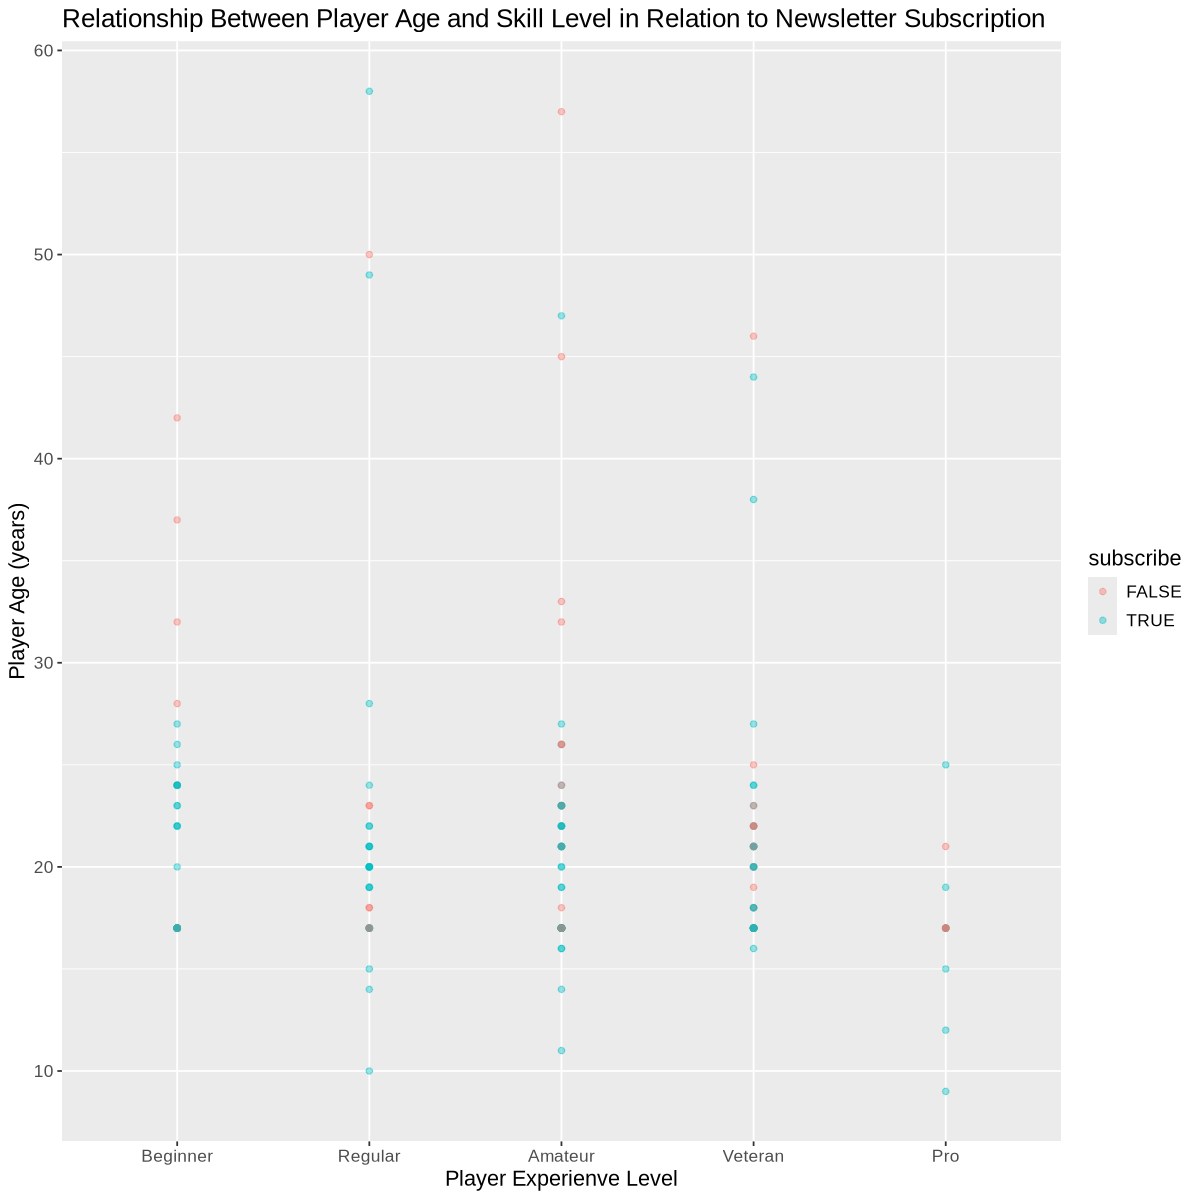

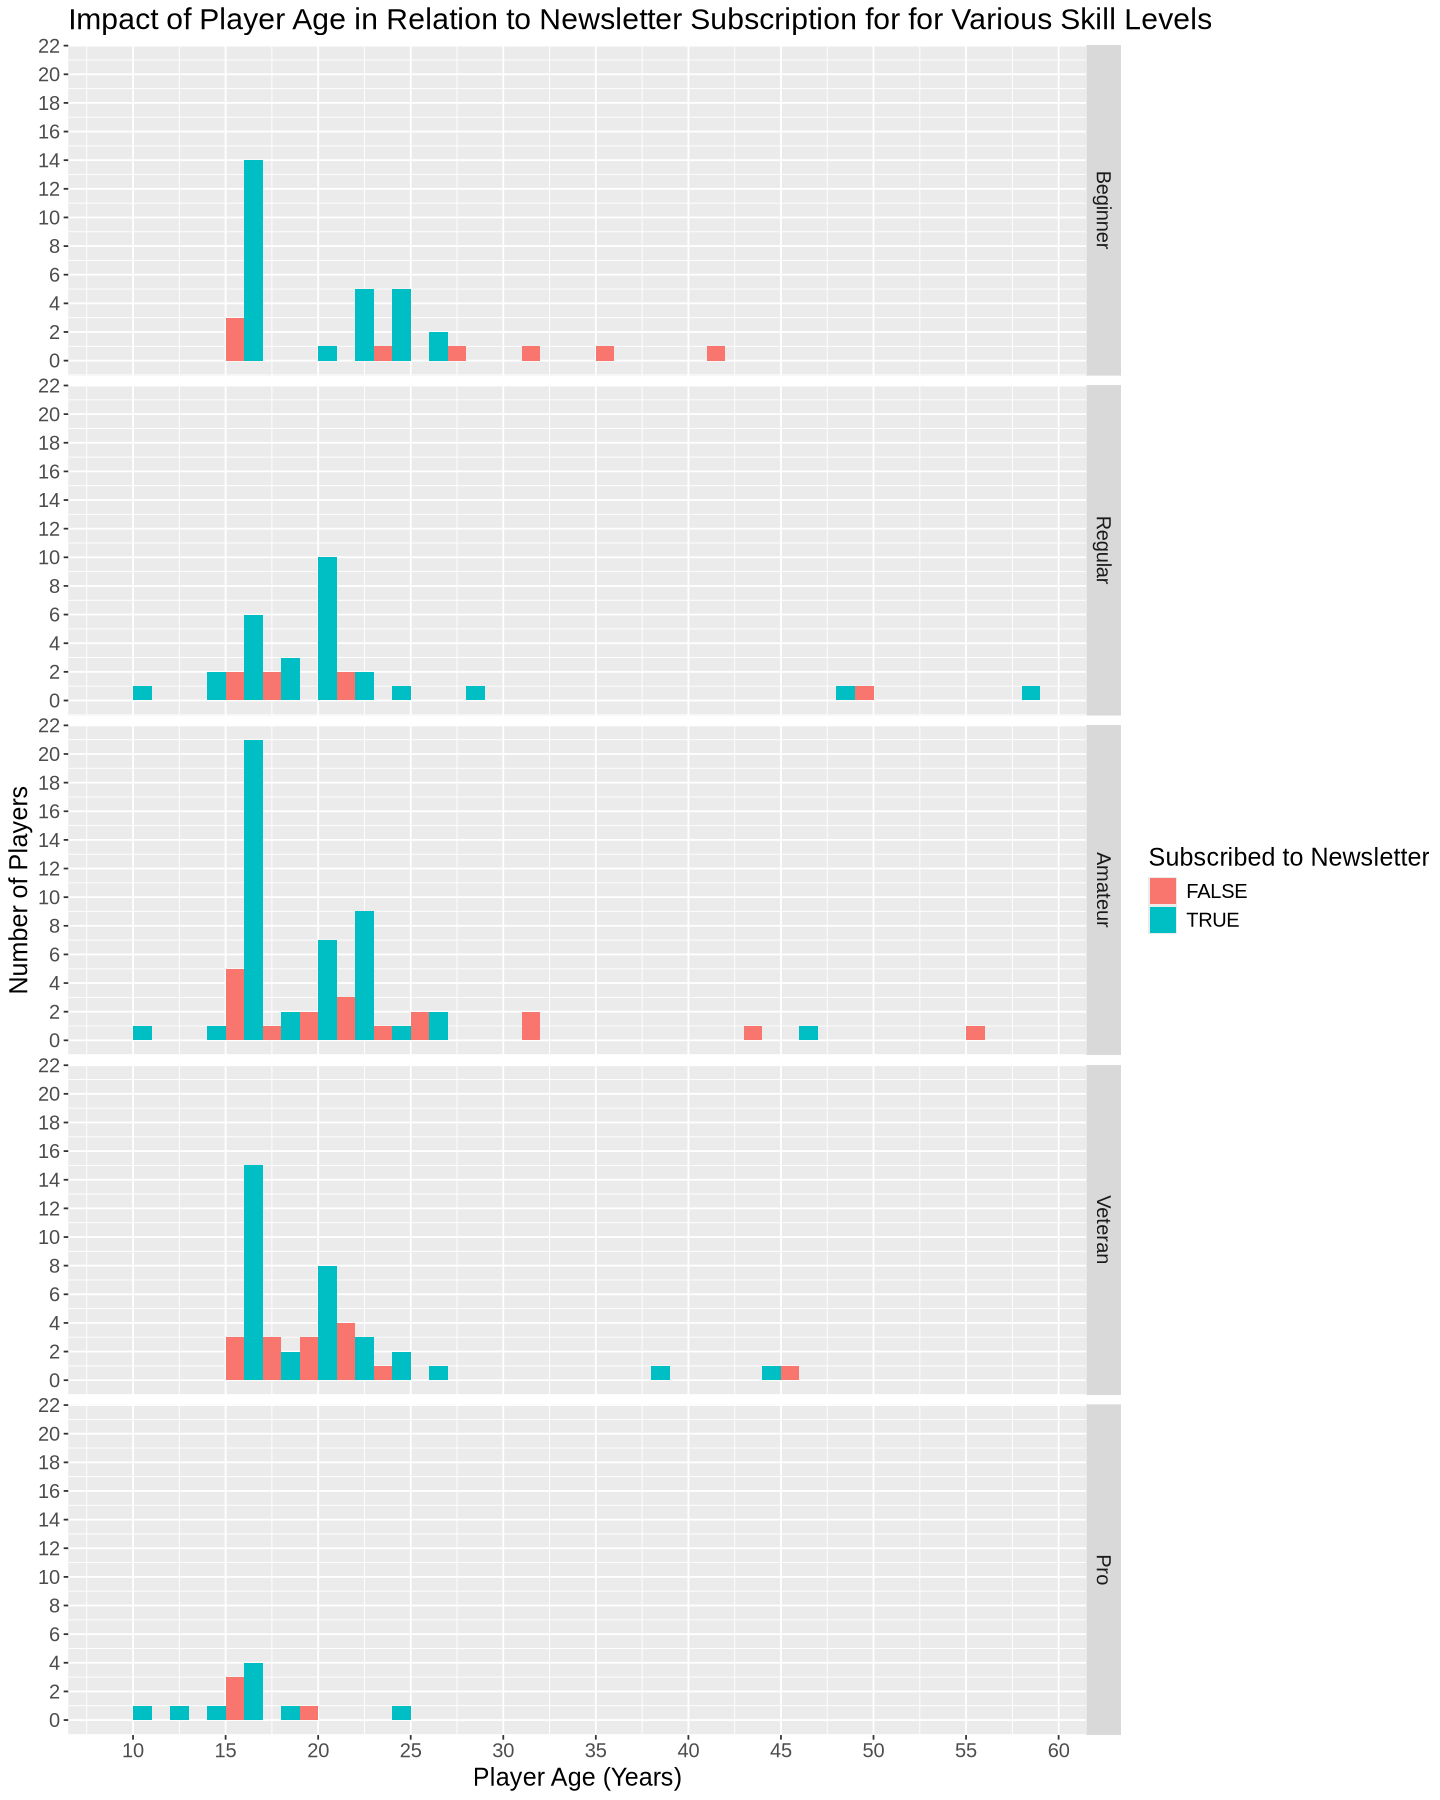

In [44]:
options(repr.plot.width = 10, repr.plot.height = 10)
players_scatter<-tidy_players_data|>
    ggplot(aes(x=experience, y=Age, color=subscribe))+
        geom_point(alpha=0.4)+ 
            xlab("Player Experienve Level")+
            ylab("Player Age (years)")+
                ggtitle("Relationship Between Player Age and Skill Level in Relation to Newsletter Subscription")+
                theme(text = element_text(size = 13))       
players_scatter

options(repr.plot.width = 12, repr.plot.height = 15)
players_hist<-tidy_players_data|>
    ggplot(aes(x=Age, fill=subscribe))+
    geom_histogram(position="dodge", binwidth=2)+
        facet_grid(rows=vars(experience))+
            scale_x_continuous(breaks = seq(10, 70, by = 5))+
            scale_y_continuous(breaks=seq(0,22, by=2))+
                labs(x="Player Age (Years)", y="Number of Players", fill= "Subscribed to Newsletter") +
                    ggtitle("Impact of Player Age in Relation to Newsletter Subscription for for Various Skill Levels")+
                    theme(text = element_text(size = 15))   
players_hist

(4)Methods and Plan:


KNN Classification is appropriate since the goal is to predict the categorical variable subscription (yes/no), using player age and experience level. Regression models are unsuitable for predicting categorical variables, requiring no model comparisons. 

It is assumed that player experience can be converted to a numeric scaled predictor for this classification. In general, KNN classification assumes that nearby points belong to the same class. This is not always the case creating a limitation of this model. We also assume that there is sufficient data to create a model, but limited data for players above the age of 25 is included in the Players set. Another limitation is the imbalance between classes as there are far more subscribers than non-subscribers, which may bias predictions.

The data will be split, 70% training:30% testing data. Using the **training** data, a 70% training:25% validation split will be performed for subsequent cross-validation to determine the appropriate k for the classification. The model will be trained with the determined k and evaluated on the test data-set.

Link to GitHub Repository: https://github.com/racheltrosenberg/dsci_individual_project.git